# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Rizqi Fachrizatur Ramadhan
- **Email:** rizqifr20@gmail.com
- **ID Dicoding:** Rizqi Fachrizatur Ramadhan

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca khususnya *temperature* dan *humidity* mempengaruhi jumlah total penyewaan sepeda?
- Apakah terdapat perbedaan yang signifikan dalam penyewaan sepeda antara  *casual user* dan *registered users* di seluruh musim?

## Import Semua Packages/Library yang Digunakan

In [27]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

## Data Wrangling

### Gathering Data

Mengunduh dataset tersebut menggunakan perintah

In [28]:
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 82.6MB/s]


Melakukan ekstraksi

In [29]:
local_zip = 'Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('bike-sharing-dataset')
zip_ref.close()

Mengecek direktori file dataset yang telah di ekstrak

In [30]:
base_dir = 'bike-sharing-dataset/'
print(os.listdir(base_dir))

['day.csv', 'hour.csv', 'Readme.txt']


In [31]:
df_day = pd.read_csv(base_dir + 'day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [32]:
df_hour = pd.read_csv(base_dir + 'hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dari data frame diatas nantinya akan digunakan untuk menentukan hubungan *temperature* dan humidity mempengaruhi jumlah total penyewaan sepeda. Dimana data tersebut nantinya kita dapat menentukan apakah penyewaan sepeda meningkat atau menurun seiring dengan perubahan kondisi cuaca.
- Dari data frame diatas juga terdapat data mengenai *casual * dan *registered * dimana dari data diatas nantinya digunakan untuk membandingkan jumlah penyewaan di seluruh musim sebagai bahan pertimbangan menentukan keuntungan yang bisa didapatkan

### Assessing Data

In [33]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dari kedua data frame diatas dapat dilihat bahwa tidak terdapat anomali

### Cleaning Data

**Insight:**
- Karena tidak terdapat anomali pada bagian *assesing data* maka tidak perlu dilakukan *cleaning data*


## Exploratory Data Analysis (EDA)

### Explore ...

In [35]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [36]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada data frame diatas digunakan kolom temp, atemp, hum, dan cnt  untuk membandingkan apakah penyewaan sepeda meningkat atau menurun seiring dengan perubahan kondisi cuaca   
- Selain itu dari data frame diatas diguakan kolom casual, registred, season untuk mengetahui perbandingan penyewaan dari  dua tipe pengguna tersebut kita bisa memfokuskan arah penjualannya berdasarkan trend dari setiap musimnya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

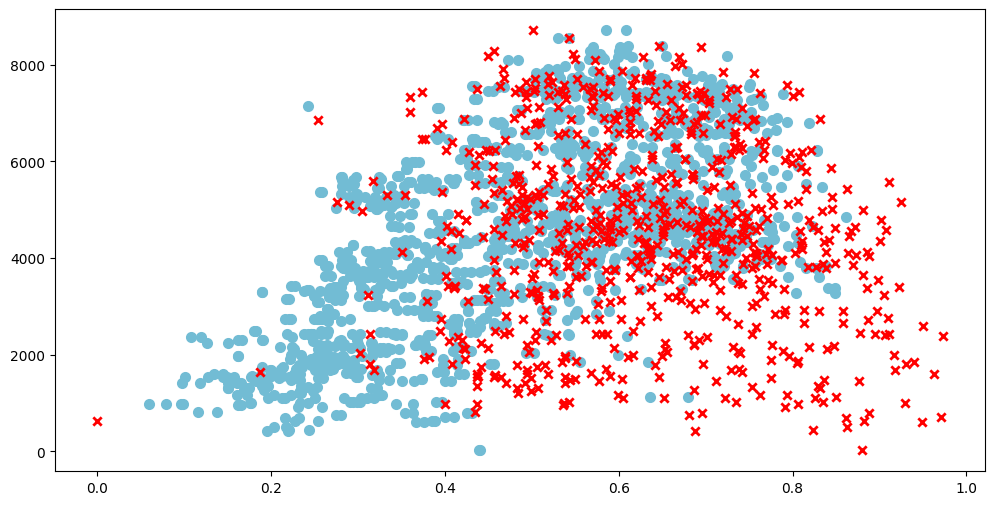

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(df_day["temp"], df_day["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.scatter(df_day["atemp"], df_day["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.scatter(df_day["hum"], df_day["cnt"], marker='x', linewidth=2, color="#FF0000")

### Pertanyaan 2:

<BarContainer object of 731 artists>

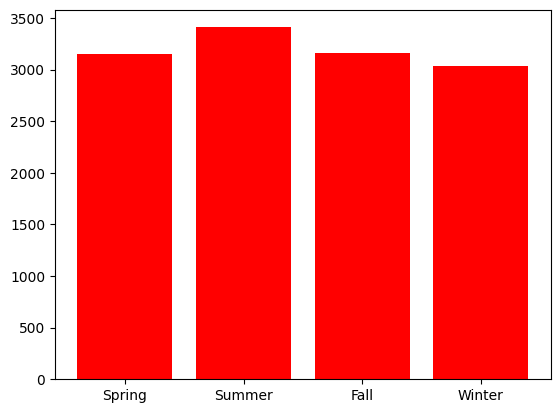

In [38]:
df_day['season_label'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
plt.bar(df_day['season_label'],df_day['casual'],color='r', label='Casual')



<BarContainer object of 731 artists>

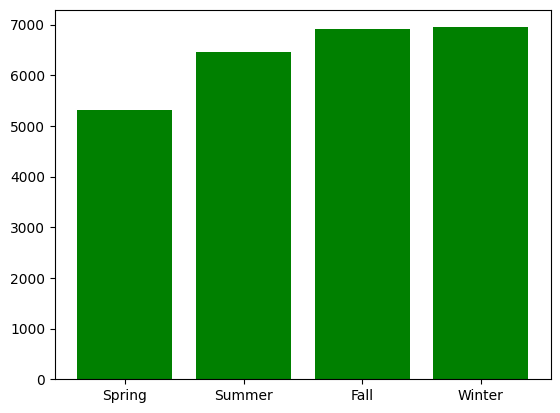

In [39]:
plt.bar(df_day['season_label'],df_day['registered'],color='g')

**Insight:**
- Grafik scatter plot ini menunjukkan hubungan antara dua variabel yang memiliki korelasi positif (di mana semakin tinggi nilai pada sumbu X, semakin tinggi nilai pada sumbu Y). Titik-titik tersebar dengan cukup luas, namun sebagian besar data terkonsentrasi di bagian tengah grafik
- Grafik pertama menunjukkan persebaran data per musim dengan Fall dan Winter memiliki nilai tertinggi, sedangkan Spring terendah. Sedangkan grafik kedua menampilkan pola serupa dengan Summer sebagai musim dengan nilai tertinggi, namun dalam skala yang lebih kecil.

## Conclusion

- Dari scatter plot yang menunjukkan hubungan antara suhu (temperature) dan kelembaban (humidity) dengan jumlah penyewaan sepeda (total rentals), terlihat bahwa suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda. Ketika suhu semakin hangat, orang-orang lebih cenderung menyewa sepeda.Kelembaban yang lebih tinggi tidak memiliki hubungan yang sangat kuat, meskipun sedikit pengaruh negatif terhadap jumlah penyewaan bisa diamati saat kelembaban tinggi.
- Pengguna Terdaftar (Registered) cenderung lebih konsisten menyewa sepeda sepanjang musim, terutama pada musim semi dan musim gugur.
Pengguna Kasual lebih aktif di musim panas, yang mungkin dipengaruhi oleh liburan dan cuaca yang lebih mendukung untuk aktivitas di luar ruangan.
Penyewaan menurun di musim dingin untuk kedua jenis pengguna, kemungkinan besar karena kondisi cuaca yang kurang bersahabat.